In [ ]:


import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
/kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z


In [ ]:
!apt-get install p7zip
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  p7zip-full
The following NEW packages will be installed:
  p7zip
0 upgraded, 1 newly installed, 0 to remove and 3 not upgraded.
Need to get 358 kB of archives.
After this operation, 1010 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 p7zip amd64 16.02+dfsg-7build1 [358 kB]
Fetched 358 kB in 2s (199 kB/s) 
Selecting previously unselected package p7zip.
(Reading database ... 99694 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-7build1_amd64.deb ...
Unpacking p7zip (16.02+dfsg-7build1) ...
Setting up p7zip (16.02+dfsg-7build1) ...

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/

In [ ]:
!unzip /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
!unzip /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip

Archive:  /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
  inflating: sample_submission_stg2.csv  
Archive:  /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
  inflating: test_stg2.tsv           


In [ ]:
train = pd.read_csv('train.tsv', sep = '\t')
test = pd.read_csv('test_stg2.tsv', sep='\t')

In [ ]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1482535, 8)
Test data shape: (3460725, 7)


In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [ ]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [ ]:
print(pd.isnull(train).sum())
print("------------")
print(pd.isnull(test).sum())

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64
------------
test_id                    0
name                       0
item_condition_id          0
category_name          14833
brand_name           1476490
shipping                   0
item_description           6
dtype: int64


In [ ]:
train.brand_name.fillna(value = "NoBrand", inplace = True)
test.brand_name.fillna(value = "NoBrand", inplace = True)

train.category_name.fillna(value = "Other/Other/Other", inplace = True)
test.category_name.fillna(value = "Other/Other/Other", inplace = True)

train.item_description.fillna(value = "No description yet", inplace = True)
test.item_description.fillna(value = "No description yet", inplace = True)

In [ ]:
print(train.isnull().any())
print("------------")
print(test.isnull().any())

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool
------------
test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name           False
shipping             False
item_description     False
dtype: bool


In [ ]:
def split(txt):
    try :
        return txt.split("/")
    except :
        return ("Other", "Other", "Other")

In [ ]:
train['general_category']=''
train['subcategory_1'] = ''
train['subcategory_2'] = ''

test['general_category']=''
test['subcategory_1'] = ''
test['subcategory_2'] = ''

In [ ]:
train['general_category'],train['subcategory_1'],train['subcategory_2'] = \
zip(*train['category_name'].apply(lambda x: split(x)))

test['general_category'],test['subcategory_1'],test['subcategory_2'] = \
zip(*test['category_name'].apply(lambda x: split(x)))

In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_category,subcategory_1,subcategory_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


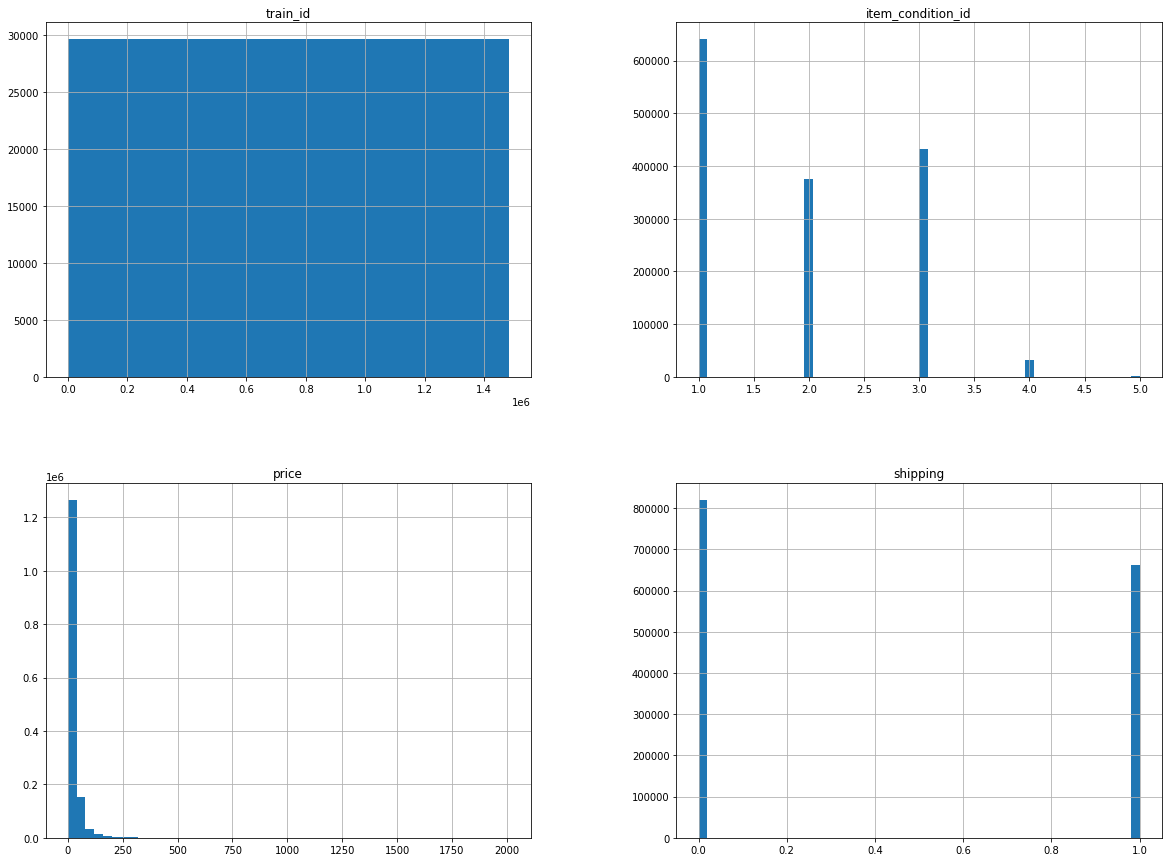

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
train['item_description'].value_counts()

No description yet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              82493
New                                                                                               

<AxesSubplot:>

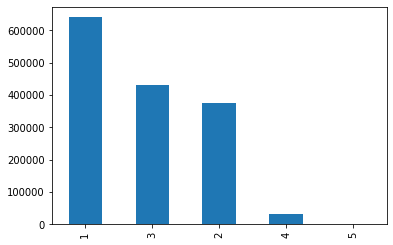

In [ ]:
train['item_condition_id'].value_counts().plot(kind='bar')

In [ ]:
train['brand_name'].value_counts()

NoBrand                 632682
PINK                     54088
Nike                     54043
Victoria's Secret        48036
LuLaRoe                  31024
                         ...  
The Learning Journey         1
Pampers Baby Fresh           1
Huggies One & Done           1
Classic Media                1
Kids Only                    1
Name: brand_name, Length: 4810, dtype: int64

<AxesSubplot:>

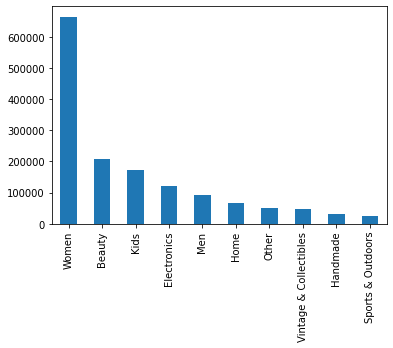

In [ ]:
train['general_category'].value_counts().plot(kind='bar')

Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: subcategory_1, Length: 113, dtype: int64

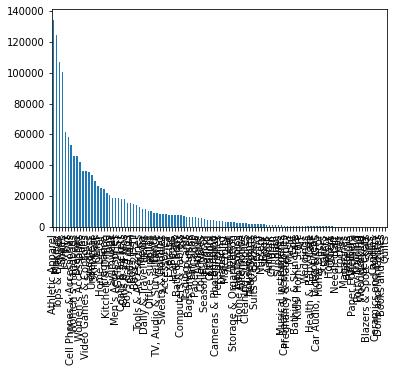

In [ ]:
train['subcategory_1'].value_counts().plot(kind='bar')
train['subcategory_1'].value_counts()

Pants, Tights, Leggings    60177
Other                      56551
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
St Patricks                    1
Garbage Disposals              1
Decorating                     1
Pet Food                       1
Ephemera                       1
Name: subcategory_2, Length: 870, dtype: int64

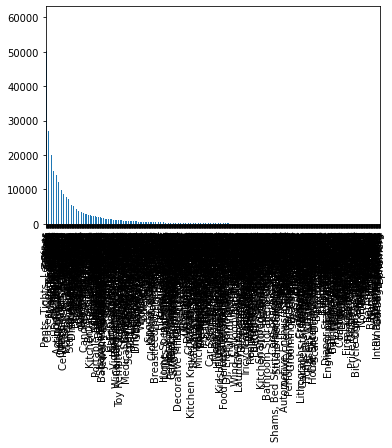

In [ ]:
train['subcategory_2'].value_counts().plot(kind='bar')
train['subcategory_2'].value_counts()

<AxesSubplot:>

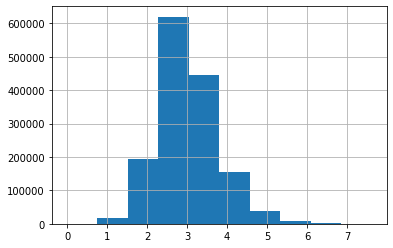

In [ ]:
log_prices = np.log1p(train.price)
log_prices.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_item_condition_id = scaler.fit_transform(train['item_condition_id'].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name = LabelBinarizer(sparse_output=True)
X_train_brand = lb_brand_name.fit_transform(train['brand_name'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_train_shipping = lb_shipping.fit_transform(train['shipping'])

lb_cat_0 = LabelBinarizer(sparse_output=True)
X_train_general_category = lb_cat_0.fit_transform(train['general_category'])

lb_cat_1 = LabelBinarizer(sparse_output=True)
X_train_subcategory_1 = lb_cat_1.fit_transform(train['subcategory_1'])

lb_cat_2 = LabelBinarizer(sparse_output=True)
X_train_subcategory_2 = lb_cat_2.fit_transform(train['subcategory_2'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_desc = TfidfVectorizer(max_features=50000, ngram_range=(1, 1), stop_words='english', norm='l2',lowercase=True)
name_vectorizer = CountVectorizer(stop_words='english')

X_train_descp = tfidf_desc.fit_transform(train['item_description'])
X_train_name = name_vectorizer.fit_transform(train['name'])

In [ ]:
from scipy.sparse import hstack

X_train = hstack((X_train_name, X_train_descp, X_train_brand, X_train_item_condition_id, X_train_shipping, X_train_general_category, X_train_subcategory_1, X_train_subcategory_2)).tocsr()

In [ ]:
X_train

<1482535x161301 sparse matrix of type '<class 'numpy.float64'>'
	with 34484880 stored elements in Compressed Sparse Row format>

In [ ]:
corr_matrix = train.corr()
corr_matrix

,train_id,item_condition_id,price,shipping
train_id,1.000000,-0.000113,0.000478,0.000472
item_condition_id,-0.000113,1.000000,-0.000807,-0.191154
price,0.000478,-0.000807,1.000000,-0.097211
shipping,0.000472,-0.191154,-0.097211,1.000000


<AxesSubplot:>

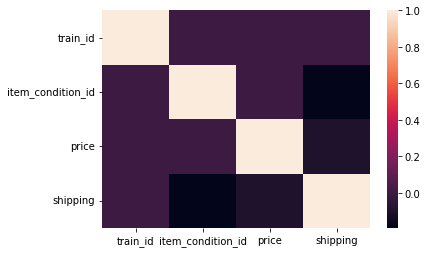

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(train, train['general_category']):
    train_idx = train_index
    test_idx = test_index

In [ ]:
test_data = X_train[test_idx]
log_test_prices = log_prices.iloc[test_idx]
train_data = X_train[train_idx]
log_train_prices = log_prices.iloc[train_idx]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def performance(ytrue, ypredicted):
    print("MSE: ",np.sqrt(mean_squared_error(ytrue, ypredicted)))
    print("MAE: ", np.sqrt(mean_absolute_error(ytrue, ypredicted)))

In [ ]:
from sklearn.linear_model import SGDRegressor

# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(train_data, log_train_prices)
performance(log_test_prices, clf_.predict(test_data))

MSE:  0.5038273880138284
MAE:  0.6156537796875793


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, \
                                 RidgeCV, Lasso, LassoCV, \
                                 ElasticNet, ElasticNetCV

In [ ]:
ridge_lin_reg = Ridge(alpha=4, max_iter= 500)
ridge_lin_reg.fit(train_data, log_train_prices)

performance(log_test_prices,ridge_lin_reg.predict(test_data))

MSE:  0.47204945011985955
MAE:  0.595407511566685


In [ ]:
from sklearn.svm import SVR

kernel_SVR = SVR(kernel='rbf', verbose=True, max_iter= 1000)
kernel_SVR.fit(train_data, log_train_prices)

performance(log_test_prices,kernel_SVR.predict(test_data))

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4675.268654, rho = -3.996270
nSV = 2000, nBSV = 2000


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


MSE:  0.685156799476271
MAE:  0.7384058389612576


    MSE:  0.6012809577308371
    MAE:  0.6765551529927671

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(verbose=True, max_depth=15, n_estimators=30)
forest_reg.fit(train_data, log_train_prices)

performance(log_test_prices, forest_reg.predict(test_data))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 163.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSE:  0.6012809577308371
MAE:  0.6765551529927671


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


    MSE:  0.59995163968476
    MAE:  0.6796141406429075

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm_model = LGBMRegressor(verbose=0, max_depth=15, n_estimators=30)
lgbm_model.fit(train_data, log_train_prices, verbose=0)

performance(log_test_prices,lgbm_model.predict(test_data))

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 729.864385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
MSE:  0.59995163968476
MAE:  0.6796141406429075


In [ ]:
from sklearn.model_selection import PredefinedSplit

In [ ]:
split_index = [-1 if x in train_idx else 0 for x in range(X_train.shape[0])]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=5, high=200),
        'max_depth': randint(low=10, high=100),
    }

lgbm_srch = LGBMRegressor()
pds = PredefinedSplit(test_fold = split_index)

rnd_search = RandomizedSearchCV(lgbm_srch, param_distributions=param_distribs,
                                n_iter=20, cv=pds, scoring='neg_mean_squared_error')

rnd_search.fit(X_train, log_prices)

In [ ]:
performance(log_test_prices,rnd_search.best_estimator_.predict(test_data))